In [13]:
import numpy as np
from collections import Counter
import math
import matplotlib.pyplot as plt

In [10]:
data = [[65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],
       [70.01, 136.46],
       [67.90, 112.37],
       [66.49, 127.45]]

In [11]:
reg_data = np.array(data)

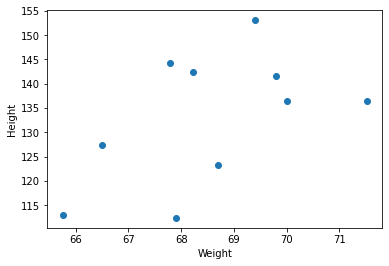

In [15]:
plt.scatter(reg_data[:,0],reg_data[:,1])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [ ]:
reg_query = [65]

In [25]:
def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)
    

In [24]:
def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)


def mean(labels):
    
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

In [34]:
reg_query = [67]
reg_k_nearest_neighbors, reg_prediction = knn(reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean)

In [35]:
reg_prediction

128.04

In [36]:
reg_k_nearest_neighbors

[(0.5100000000000051, 9), (0.7900000000000063, 4), (0.9000000000000057, 8)]

In [37]:
reg_data

array([[ 65.75, 112.99],
       [ 71.52, 136.49],
       [ 69.4 , 153.03],
       [ 68.22, 142.34],
       [ 67.79, 144.3 ],
       [ 68.7 , 123.3 ],
       [ 69.8 , 141.49],
       [ 70.01, 136.46],
       [ 67.9 , 112.37],
       [ 66.49, 127.45]])

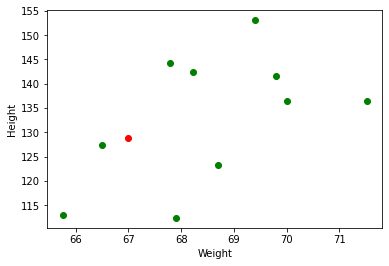

In [39]:
plt.scatter(reg_data[:,0],reg_data[:,1],color="green",label="Acutal data")
plt.scatter(67,128.8,color="red",label="Input data")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()